<a href="https://colab.research.google.com/github/sumukhbhat12/Tensor-Flow-Course-FreeCodeCamp/blob/main/Core_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [561]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

This dataset has been referred from Kaggle

dataset: https://www.kaggle.com/datasets/yasserh/titanic-dataset

In [562]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [563]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


divide the dataset into test and train

In [564]:
df_train, df_test = np.split(df, [int(0.8 * len(df))])
df_test = df_test.reset_index()
df_test = df_test.drop(['index'], axis=1)
print(len(df_train), len(df_test))

712 179


In [565]:
X_train = df_train
X_test = df_test
y_train = X_train.pop('Survived')
y_test = X_test.pop('Survived')

In [566]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [567]:
y_train.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

visualizing the dataset

<Axes: >

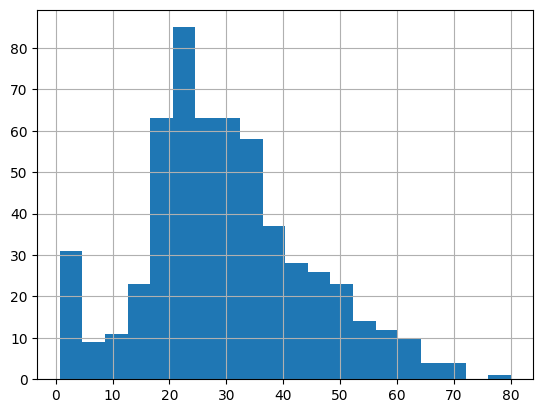

In [568]:
X_train.Age.hist(bins=20)

value_counts() gives count of unique elements and sorted in descending order

<Axes: >

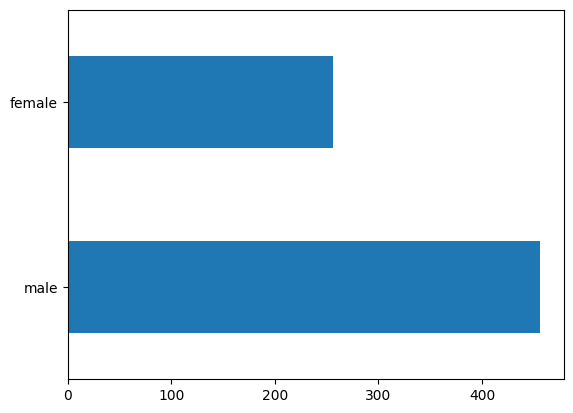

In [569]:
X_train.Sex.value_counts().plot(kind='barh')

<Axes: >

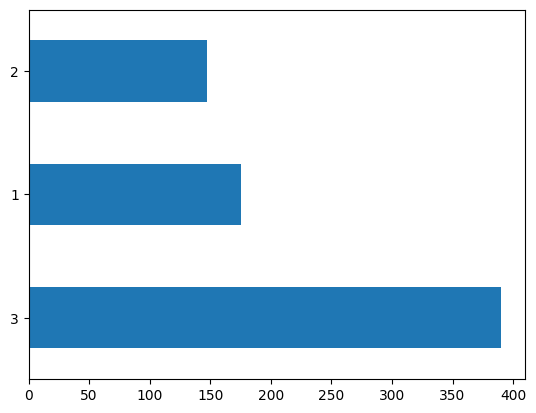

In [570]:
X_train['Pclass'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survived')

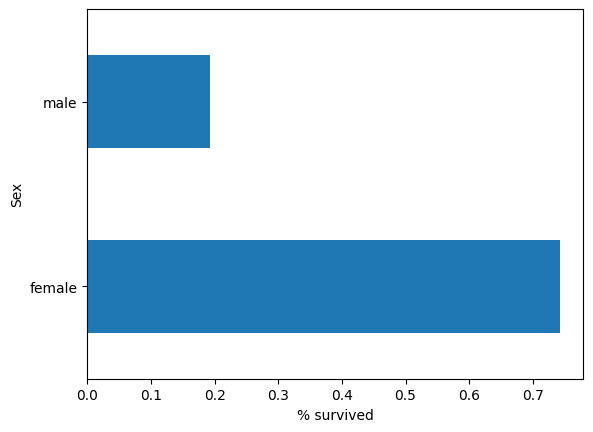

In [571]:
pd.concat([X_train, y_train], axis=1).groupby('Sex').Survived.mean().plot(kind='barh').set_xlabel('% survived')

In [572]:
categorical_columns = ['Sex','Cabin','Embarked', 'SibSp', 'Pclass', 'Parch']
Numeric_columns = ['Age', 'Fare']
# 'Ticket' and 'Name columns are unique for all individuals hence we'll drop it since we don't have any use for that column

Check how many unique items does categorical columns have

In [573]:
len(df['Ticket'].unique())

681

In [574]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [575]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [576]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [577]:
df['Pclass'].unique()

array([3, 1, 2])

In [578]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [579]:
X_train = X_train.drop(['Name','Ticket'], axis=1)
X_test = X_test.drop(['Name', "Ticket"], axis=1)

In [580]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,female,38.0,1,0,71.2833,C85,C
2,3,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,female,35.0,1,0,53.1000,C123,S
4,5,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
707,708,1,male,42.0,0,0,26.2875,E24,S
708,709,1,female,22.0,0,0,151.5500,NaN,S
709,710,3,male,NaN,1,1,15.2458,NaN,C
710,711,1,female,24.0,0,0,49.5042,C90,C


In [581]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,713,1,male,48.0,1,0,52.0000,C126,S
1,714,3,male,29.0,0,0,9.4833,NaN,S
2,715,2,male,52.0,0,0,13.0000,NaN,S
3,716,3,male,19.0,0,0,7.6500,F G73,S
4,717,1,female,38.0,0,0,227.5250,C45,C


In [582]:
X_train.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            147
SibSp            0
Parch            0
Fare             0
Cabin          550
Embarked         1
dtype: int64

only take the first letter of cabins into consideration and discard everything else,

change nan values into string 'N' because otherwise the make_input_fn below will throw nan error

In [583]:
def convert_cabin(df):
  # df['Cabin'] = [ cabin[0] for cabin in df['Cabin'] if type(cabin) == str else cabin]
  list_of_cabins = []
  for cabin in df['Cabin']:
    if type(cabin) == str:
      list_of_cabins.append(cabin[0])
    else:
      list_of_cabins.append('N')
  df['Cabin'] = list_of_cabins
  return df

convert cabin info into single letters

In [584]:
X_train = convert_cabin(X_train)

In [585]:
X_train['Cabin'].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [586]:
X_test = convert_cabin(X_test)

In [587]:
X_train.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            147
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         1
dtype: int64

In [588]:
X_train[X_train['Embarked'].isna()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,62,1,female,38.0,0,0,80.0,B,NaN


Replace the Null values in Embarked Column with 'N' string

In [589]:
def remove_null_embarked(dataframe):
  embarked = []
  for city in dataframe['Embarked']:
    if type(city) != str:
      embarked.append('N')
    else:
      embarked.append(city)
  dataframe['Embarked'] = embarked
  return dataframe

In [590]:
X_train = remove_null_embarked(X_train)
print(X_train.isna().sum())

PassengerId      0
Pclass           0
Sex              0
Age            147
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
dtype: int64


In [591]:
X_train['Embarked'].unique()

array(['S', 'C', 'Q', 'N'], dtype=object)

Do the same thing for test dataset as well

In [592]:
X_test = remove_null_embarked(X_test)
print(X_test.isna().sum())
print(X_test['Embarked'].unique())

PassengerId     0
Pclass          0
Sex             0
Age            30
SibSp           0
Parch           0
Fare            0
Cabin           0
Embarked        0
dtype: int64
['S' 'C' 'Q' 'N']


Fill Age Column null values with median age

In [593]:
X_train['Age'].median()

28.0

In [594]:
def fill_age_with_median(dataframe):
  dataframe['Age'].fillna(dataframe['Age'].median(), inplace=True)
  return dataframe

In [595]:
X_train.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age            147
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [596]:
X_train = fill_age_with_median(X_train)
print(X_train.isna().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [597]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,7.2500,N,S
1,2,1,female,38.0,1,0,71.2833,C,C
2,3,3,female,26.0,0,0,7.9250,N,S
3,4,1,female,35.0,1,0,53.1000,C,S
4,5,3,male,35.0,0,0,8.0500,N,S
...,...,...,...,...,...,...,...,...,...
707,708,1,male,42.0,0,0,26.2875,E,S
708,709,1,female,22.0,0,0,151.5500,N,S
709,710,3,male,28.0,1,1,15.2458,N,C
710,711,1,female,24.0,0,0,49.5042,C,C


Do the same for test dataset as well

In [598]:
X_test = fill_age_with_median(X_test)
print(X_test.isna().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [599]:
feature_columns = []

In [600]:
for feature_name in categorical_columns:
  vocabulary = X_train[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

In [601]:
for feature_name in Numeric_columns:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [602]:
print(feature_columns)

[VocabularyListCategoricalColumn(key='Sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Cabin', vocabulary_list=('N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Embarked', vocabulary_list=('S', 'C', 'Q', 'N'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='SibSp', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Pclass', vocabulary_list=(3, 1, 2), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Parch', vocabulary_list=(0, 1, 2, 5, 3, 4, 6), dtype=tf.int64, default_value=-1, num_oov_buckets=0), NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Fare', shape=(1,), default_value=None, dtyp

Input function to convert input pandas dataframe into tf.data.Dataset object, which is fed into the TensorFlow model

In [603]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(X_train, y_train)
test_input_fn = make_input_fn(X_test, y_test, num_epochs=1, shuffle=False)

In [604]:
train_input_fn()


<_RepeatDataset element_spec=({'PassengerId': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Pclass': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Sex': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'Age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'SibSp': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Parch': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Fare': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Cabin': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'Embarked': TensorSpec(shape=(None,), dtype=tf.string, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

# Linear Classifier

Creating the model

In [605]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

Training the model

In [606]:
linear_est.train(train_input_fn)

result = linear_est.evaluate(test_input_fn)

In [607]:
print(result['accuracy'])

0.79888266


In [608]:
result

{'accuracy': 0.79888266,
 'accuracy_baseline': 0.6424581,
 'auc': 0.85163045,
 'auc_precision_recall': 0.8174973,
 'average_loss': 0.46132687,
 'label/mean': 0.3575419,
 'loss': 0.4581894,
 'precision': 0.7058824,
 'prediction/mean': 0.4493069,
 'recall': 0.75,
 'global_step': 230}

Predicting

In [609]:
result = list(linear_est.predict(test_input_fn))
print(result[0])

{'logits': array([-0.41056544], dtype=float32), 'logistic': array([0.39877656], dtype=float32), 'probabilities': array([0.60122347, 0.39877656], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}


array([dead,  survived])

In [610]:
result[0]['probabilities']

array([0.60122347, 0.39877656], dtype=float32)

In [617]:
X_test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,713,1,male,48.0,1,0,52.0000,C,S
1,714,3,male,29.0,0,0,9.4833,N,S
2,715,2,male,52.0,0,0,13.0000,N,S
3,716,3,male,19.0,0,0,7.6500,F,S
4,717,1,female,38.0,0,0,227.5250,C,C
5,718,2,female,27.0,0,0,10.5000,E,S
6,719,3,male,28.0,0,0,15.5000,N,Q
7,720,3,male,33.0,0,0,7.7750,N,S
8,721,2,female,6.0,0,1,33.0000,N,S
9,722,3,male,17.0,1,0,7.0542,N,S


In [614]:
def get_individual_result(index):
  print(X_test.loc[index])
  print("Survival probability : ", result[index]['probabilities'][1])
  print("Actual Survival : ", y_test[index])

In [620]:
get_individual_result(8)

PassengerId       721
Pclass              2
Sex            female
Age               6.0
SibSp               0
Parch               1
Fare             33.0
Cabin               N
Embarked            S
Name: 8, dtype: object
Survival probability :  0.8709287
Actual Survival :  1
